## APP PRICING

In this project we work with data relationated to apps sold in APP Store. 

To set a price is one of the most important aspect of marketing mix. Thanks to data processing and the algorithms of machine learning we can go further in this important field and set a reference price with the competition (one pricing modality) 

It is a googd exercise for improving data science skills, due to the several aspect that have to be treated. We will go trhough EDA (Exploratory Data Analysis), preproceesing of the Data (imbalance data, scaling, PCA..) and used of Pipelines.

I saw the necesity to split the project in two differents models:

1) One model to clasify is we have to set a price or set it free: **CLASSIFICATION**

2) Other model to calculate the best price due to the data: **REGRESSION**

In [2]:
# import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from datetime import datetime, date

import warnings
warnings.filterwarnings('ignore')

In [3]:
path = os.getcwd()
path

'C:\\Users\\igart\\Desktop\\PROYECTO 2\\PROYECTO APP STORE'

In [4]:
print(os.listdir(path))
#os.mkdir(path="final_model")

['.ipynb_checkpoints', 'final_model', 'googleplaystore.csv', 'googleplaystore_user_reviews.csv', 'license.txt', 'matriz-confusion-sencilla.JPG', 'PRICING DECISION APP.ipynb']


In [5]:
#import the data
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Feature Explanation**

App :- Name of the App

Category :- Category under which the App falls.

Rating :- Application's rating on playstore

Reviews :- Number of reviews of the App.

Size :- Size of the App.

Install :- Number of Installs of the App

Type :- If the App is free/paid

Price :- Price of the app (0 if it is Free)

Content Rating :- Appropiate Target Audience of the App.

Genres:- Genre under which the App falls.

Last Updated :- Date when the App was last updated

Current Ver :- Current Version of the Application

Android Ver :- Minimum Android Version required to run the App

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


As we can see there are 13 columns with only one type float (numeric). We can also realize which of these features will not need for our purpose and estimate which of them could have null values

## FEATURE ENGINEERING

In [7]:
# I make a helpful function to understand the feature
def fastview(serie, df=df):
    
        isna = "the feature has %d nan values" % (serie.isna().sum())
        isnull = "the feature has %d null values" % (serie.isnull().sum())
        types =  "the feature has the type of %s" % (serie.dtype)
        count =  serie.value_counts().head(10)
        
        if serie.dtype=="object":
            uniques = "the feature has %d unique values and the dataframe has %s rows" % (serie.unique().size, len(df))
            print(uniques)
            if serie.unique().size < 25:
                print(serie.value_counts().plot(kind="pie"))
        
        return isna, isnull, types,  count                           

**FEATURES**

TYPE: my target feature

the feature has 4 unique values and the dataframe has 10841 rows
AxesSubplot(0.125,0.125;0.775x0.755)


('the feature has 1 nan values',
 'the feature has 1 null values',
 'the feature has the type of object',
 Free    10039
 Paid      800
 0           1
 Name: Type, dtype: int64)

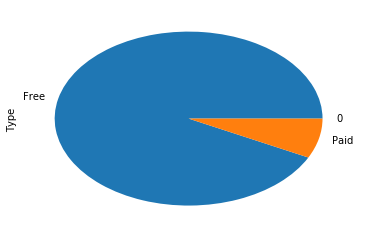

In [9]:
fastview(df.Type)

In [10]:
df[df.Type=="0"] # error data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
df = df[df.Type!="0"] # not sense data
df = df[ ~ df.Type.isna()] # unnecesary data

the feature has 2 unique values and the dataframe has 10841 rows
AxesSubplot(0.125,0.125;0.775x0.755)


('the feature has 0 nan values',
 'the feature has 0 null values',
 'the feature has the type of object',
 Free    10039
 Paid      800
 Name: Type, dtype: int64)

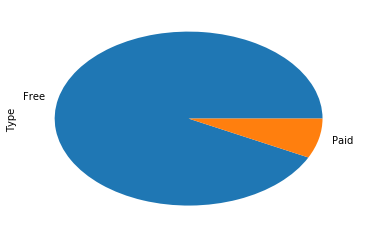

In [12]:
fastview(df.Type)

APP

In [13]:
fastview(df.App)

the feature has 9658 unique values and the dataframe has 10841 rows


('the feature has 0 nan values',
 'the feature has 0 null values',
 'the feature has the type of object',
 ROBLOX                                                9
 CBS Sports App - Scores, News, Stats & Watch Live     8
 8 Ball Pool                                           7
 Candy Crush Saga                                      7
 ESPN                                                  7
 Duolingo: Learn Languages Free                        7
 Subway Surfers                                        6
 Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
 Bleacher Report: sports news, scores, & highlights    6
 Zombie Catchers                                       6
 Name: App, dtype: int64)

In [16]:
df[df.App=="ROBLOX"].head() # duplicates: unnecessary data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [17]:
# we need to drop duplicate apps to take the usefullness information
df.drop_duplicates(subset="App",inplace=True)

In [18]:
fastview(df.App,df)

the feature has 9658 unique values and the dataframe has 9658 rows


('the feature has 0 nan values',
 'the feature has 0 null values',
 'the feature has the type of object',
 Samsung Notes                                       1
 Listen to the story~The Story of the Fairy Tales    1
 English words application mikan                     1
 HD Video Player (wmv,avi,mp4,flv,av,mpg,mkv)2017    1
 CSCS BG (в български)                               1
 High Blood Pressure                                 1
 Caviar - Food Delivery                              1
 FHR 5-Tier 2.0                                      1
 Control Center iOS 11 - Phone X Control Panel       1
 Lock 'n' Roll Pro - Ad Free                         1
 Name: App, dtype: int64)

CATEGORY

In [19]:
fastview(df.Category,df)

the feature has 33 unique values and the dataframe has 9658 rows


('the feature has 0 nan values',
 'the feature has 0 null values',
 'the feature has the type of object',
 FAMILY             1831
 GAME                959
 TOOLS               827
 BUSINESS            420
 MEDICAL             395
 PERSONALIZATION     376
 PRODUCTIVITY        374
 LIFESTYLE           369
 FINANCE             345
 SPORTS              325
 Name: Category, dtype: int64)

RATING

In [20]:
fastview(df.Rating)

('the feature has 1462 nan values',
 'the feature has 1462 null values',
 'the feature has the type of float64',
 4.3    897
 4.4    895
 4.5    848
 4.2    810
 4.6    683
 4.1    621
 4.0    513
 4.7    442
 3.9    359
 3.8    286
 Name: Rating, dtype: int64)

In [21]:
df.Rating.value_counts().sum()

8196

In [22]:
 df.Rating.values

array([4.1, 3.9, 4.7, ..., nan, 4.5, 4.5])

In [23]:
df.Rating.isna().sum()

1462

In [24]:
df.Rating.isnull().any().sum()

1

In [25]:
print("the data have %d rows and only %d ratings confirmed" % (len(df),int(df.Rating.value_counts().sum())))

the data have 9658 rows and only 8196 ratings confirmed


In [26]:
df.Rating.unique().size

40

In [27]:
df.Rating.describe()[4:8] #extract quatiles

25%    4.0
50%    4.3
75%    4.5
max    5.0
Name: Rating, dtype: float64

In [28]:
df.Rating = df.Rating.fillna(df.Rating.describe()[4:8].mean()) # fill with the mean of the quatiles
print("Raitings column contains ",df.Rating.isna().any().sum()," Nan values.")

Raitings column contains  0  Nan values.


REVIEWS

In [29]:
fastview(df.Reviews)

the feature has 5330 unique values and the dataframe has 10841 rows


('the feature has 0 nan values',
 'the feature has 0 null values',
 'the feature has the type of object',
 0    592
 1    272
 2    213
 3    170
 4    137
 5    108
 6     94
 7     88
 8     72
 9     64
 Name: Reviews, dtype: int64)

In [30]:
print("Reviews column contains ",df.Reviews.str.isnumeric().sum()," str.numeric values and the lenght of the dataset is",len(df))

Reviews column contains  9658  str.numeric values and the lenght of the dataset is 9658


In [31]:
df.Reviews = df.Reviews.astype(int) #change to numeric (int)

SIZE

In [32]:
fastview(df.Size)

the feature has 461 unique values and the dataframe has 10841 rows


('the feature has 0 nan values',
 'the feature has 0 null values',
 'the feature has the type of object',
 Varies with device    1226
 11M                    182
 12M                    181
 13M                    177
 14M                    177
 15M                    163
 17M                    146
 26M                    142
 16M                    137
 19M                    130
 Name: Size, dtype: int64)

In [33]:
df.Size.value_counts().head(10)

Varies with device    1226
11M                    182
12M                    181
13M                    177
14M                    177
15M                    163
17M                    146
26M                    142
16M                    137
19M                    130
Name: Size, dtype: int64

In [34]:
values = np.array([],dtype=str)

for i in df.Size:
    if i[-1] not in values:
        values = np.append(values,i[-1])
print("The size feature have the next termination strings: %s" % (values)) 
    

The size feature have the next termination strings: ['M' 'e' 'k']


In [35]:
# As long as size is a feature that we can intrinsectly consider important for princing
#I will see the necesity of eliminate the nan data 
x = [i for i in df.Size if i=="Varies with device"]
print("relation percentage inexistance of Size over total dataset:%d" % ((len(x)/len(df))*100))
#As we see it is too much to eliminate, morover when we have not so much data with price so I will consider fill the nan

relation percentage inexistance of Size over total dataset:12


In [36]:
def convert_size(value):
    
    if value[-1]=="M":
        value = float(value.replace('M',''))
        value = value*1000000
    elif value[-1] == ["k"]:
        value = float(value.replace('k',''))
        value = value*1000
    else:
        value = np.nan 
        
    return (value)
    

In [37]:
df.Size=df.Size.map(convert_size)


In [38]:
# We fill the nan values with the mean of the Size because we consider that nan values are an important sum relating the data
df.Size.fillna(np.mean(df.Size[df.Size!=np.nan]),inplace=True)

In [39]:
df.Size.isna().any() # to check the correct fillnan

False

In [40]:
fastview(df.Size)

('the feature has 0 nan values',
 'the feature has 0 null values',
 'the feature has the type of float64',
 2.116677e+07    1540
 1.100000e+07     182
 1.200000e+07     181
 1.400000e+07     177
 1.300000e+07     177
 1.500000e+07     163
 1.700000e+07     146
 2.600000e+07     142
 1.000000e+07     138
 1.600000e+07     137
 Name: Size, dtype: int64)

INSTALL

the feature has 20 unique values and the dataframe has 10841 rows
AxesSubplot(0.125,0.125;0.775x0.755)


('the feature has 0 nan values',
 'the feature has 0 null values',
 'the feature has the type of object',
 1,000,000+     1417
 100,000+       1112
 10,000+        1031
 10,000,000+     937
 1,000+          888
 100+            710
 5,000,000+      607
 500,000+        505
 50,000+         469
 5,000+          468
 Name: Installs, dtype: int64)

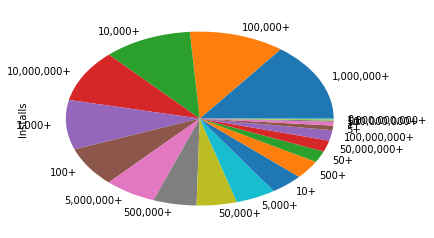

In [41]:
fastview(df.Installs)

In [42]:
#rest are numeric but with '+' and ',' which shall be removed to convert these into numeric type.
# replace and strip to convert to float
df.Installs = [float(x.strip('+').replace(',','')) for x in df.Installs]

In [43]:
fastview(df.Installs)

('the feature has 0 nan values',
 'the feature has 0 null values',
 'the feature has the type of float64',
 1000000.0     1417
 100000.0      1112
 10000.0       1031
 10000000.0     937
 1000.0         888
 100.0          710
 5000000.0      607
 500000.0       505
 50000.0        469
 5000.0         468
 Name: Installs, dtype: int64)

In [44]:
print(df.Installs.isnull().any())# don´t understand why is False and there are null values...
df[df.Installs==0]

False


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,4.45,0,5500000.0,0.0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",1.1,4.2 and up
5307,Ak Parti Yardım Toplama,SOCIAL,4.45,0,8700000.0,0.0,Paid,$13.99,Teen,Social,"July 28, 2017",3.4.4.3.3,4.1 and up
5486,AP Series Solution Pro,FAMILY,4.45,0,7400000.0,0.0,Paid,$1.99,Everyone,Education,"July 30, 2017",1.3,4.0 and up
5945,Ain Arabic Kids Alif Ba ta,FAMILY,4.45,0,33000000.0,0.0,Paid,$2.99,Everyone,Education,"April 15, 2016",1.0,3.0 and up
6692,cronometra-br,PRODUCTIVITY,4.45,0,5400000.0,0.0,Paid,$154.99,Everyone,Productivity,"November 24, 2017",1.0.0,4.1 and up
7434,Pekalongan CJ,SOCIAL,4.45,0,5900000.0,0.0,Free,0,Teen,Social,"July 21, 2018",0.0.1,4.4 and up
8081,CX Network,BUSINESS,4.45,0,10000000.0,0.0,Free,0,Everyone,Business,"August 6, 2018",1.3.1,4.1 and up
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,4.45,0,2100000.0,0.0,Free,0,Everyone,News & Magazines,"July 7, 2018",1.1,4.4 and up
8871,Test Application DT 02,ART_AND_DESIGN,4.45,0,1200000.0,0.0,Free,0,Everyone,Art & Design,"March 14, 2017",4.0,4.2 and up
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,4.45,0,56000000.0,0.0,Paid,$3.99,Everyone,Travel & Local,"January 22, 2017",1.1.1,4.1 and up


In [45]:
df = df[df.Installs!=0] # remove null value because it would be an inexactly data

PRICE

In [46]:
fastview(df.Price)

the feature has 88 unique values and the dataframe has 10841 rows


('the feature has 0 nan values',
 'the feature has 0 null values',
 'the feature has the type of object',
 0        8898
 $0.99     145
 $2.99     123
 $1.99      72
 $4.99      70
 $3.99      56
 $1.49      45
 $5.99      26
 $2.49      25
 $9.99      19
 Name: Price, dtype: int64)

In [47]:
df.Price = [float(x.strip('$')) for x in df.Price] # strip string value of the data to convert to float

Text(0,0.5,'Frequency')

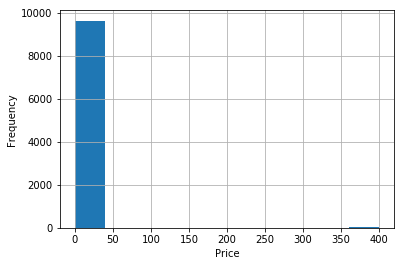

In [48]:
df.Price.hist();
plt.xlabel('Price')
plt.ylabel('Frequency')
#Almost all the app are free

CONTENT RATING

the feature has 6 unique values and the dataframe has 10841 rows
AxesSubplot(0.125,0.125;0.775x0.755)


('the feature has 0 nan values',
 'the feature has 0 null values',
 'the feature has the type of object',
 Everyone           7891
 Teen               1034
 Mature 17+          393
 Everyone 10+        321
 Adults only 18+       3
 Unrated               2
 Name: Content Rating, dtype: int64)

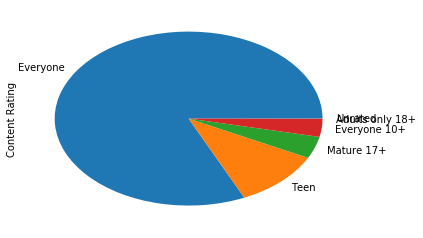

In [49]:
fastview(df['Content Rating'])

GENRES

In [50]:
fastview(df.Genres)

the feature has 118 unique values and the dataframe has 10841 rows


('the feature has 0 nan values',
 'the feature has 0 null values',
 'the feature has the type of object',
 Tools              826
 Entertainment      561
 Education          508
 Business           419
 Medical            394
 Personalization    375
 Productivity       373
 Lifestyle          367
 Finance            343
 Sports             331
 Name: Genres, dtype: int64)

In [51]:
df.Genres.value_counts().unique
print("The number of genres is %s and the lenght of data is %s " %(len(df.Genres.unique()),len(df)))
# category feature. We don´t do anything at this time

The number of genres is 118 and the lenght of data is 9644 


In [52]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


LAST UPDATED

In [53]:
fastview(df['Last Updated'])

the feature has 1376 unique values and the dataframe has 10841 rows


('the feature has 0 nan values',
 'the feature has 0 null values',
 'the feature has the type of object',
 August 3, 2018    252
 August 2, 2018    230
 August 1, 2018    209
 July 31, 2018     204
 July 30, 2018     160
 July 26, 2018     135
 July 25, 2018     129
 July 24, 2018     121
 July 27, 2018     120
 August 6, 2018    114
 Name: Last Updated, dtype: int64)

In [54]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"], dayfirst=True)

In [55]:
# I am taking a difference between last updated date and today in order to simplify the data

In [56]:
df["Last Updated"] = (datetime.today() - df["Last Updated"]).apply(lambda x:int(str(x).split()[0]))

In [57]:
df["Last Updated"] = df["Last Updated"].astype('int32')

In [58]:
fastview(df['Last Updated'])

('the feature has 0 nan values',
 'the feature has 0 null values',
 'the feature has the type of int32',
 609    252
 610    230
 611    209
 612    204
 613    160
 617    135
 618    129
 619    121
 616    120
 606    114
 Name: Last Updated, dtype: int64)

CURRENT VERSION 

In [59]:
fastview(df['Current Ver'])

the feature has 2816 unique values and the dataframe has 10841 rows


('the feature has 8 nan values',
 'the feature has 8 null values',
 'the feature has the type of object',
 Varies with device    1054
 1.0                    795
 1.1                    258
 1.2                    176
 2.0                    149
 1.3                    139
 1.0.0                  132
 1.0.1                  115
 1.4                     87
 1.5                     80
 Name: Current Ver, dtype: int64)

In [60]:
df.fillna("Varies with device",inplace=True)

In [61]:
# in order to reduce categories and simplify the data I will take until the second update number
df["Current Ver"] = ["Varies with device" if x=="Varies with device" else str(x)[:3] for x in df["Current Ver"]]

In [62]:
fastview(df['Current Ver'])

the feature has 300 unique values and the dataframe has 10841 rows


('the feature has 0 nan values',
 'the feature has 0 null values',
 'the feature has the type of object',
 1.0                   1714
 Varies with device    1062
 1.1                    723
 1.2                    504
 2.0                    374
 1.3                    313
 2.1                    288
 1.4                    217
 3.0                    200
 1.5                    195
 Name: Current Ver, dtype: int64)

ANDROID VERSION

In [63]:
fastview(df['Android Ver'])

the feature has 33 unique values and the dataframe has 10841 rows


('the feature has 0 nan values',
 'the feature has 0 null values',
 'the feature has the type of object',
 4.1 and up            2197
 4.0.3 and up          1394
 4.0 and up            1283
 Varies with device     991
 4.4 and up             816
 2.3 and up             616
 5.0 and up             512
 4.2 and up             370
 2.3.3 and up           273
 2.2 and up             239
 Name: Android Ver, dtype: int64)

In [64]:
# in order to reduce categories and simplify the data I will take until the second update number
df["Android Ver"] = ["Varies with device" if x=="Varies with device" else str(x)[:3] for x in df["Android Ver"] ]

the feature has 22 unique values and the dataframe has 10841 rows
AxesSubplot(0.125,0.125;0.775x0.755)


('the feature has 0 nan values',
 'the feature has 0 null values',
 'the feature has the type of object',
 4.0                   2679
 4.1                   2198
 Varies with device     991
 2.3                    889
 4.4                    827
 5.0                    516
 4.2                    370
 2.2                    240
 3.0                    229
 4.3                    221
 Name: Android Ver, dtype: int64)

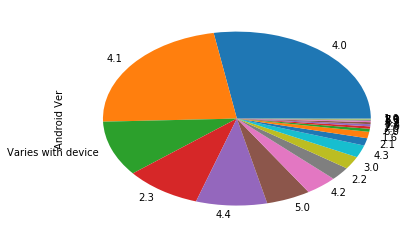

In [65]:
fastview(df['Android Ver'])

## Meeting features

In [66]:
df.index = range(len(df))

In [67]:
len(df)==df['App'].nunique()# to check no duplicates apps

True

In [68]:
df.set_index('App',inplace=True)

In [69]:
corr_table = df.corr(method="pearson")
corr_table

,Rating,Reviews,Size,Installs,Price,Last Updated
Rating,1.000000,0.044196,0.021276,0.027371,-0.022475,-0.112670
Reviews,0.044196,1.000000,0.084942,0.625155,-0.007252,-0.065787
Size,0.021276,0.084942,1.000000,0.056773,-0.020653,-0.147337
Installs,0.027371,0.625155,0.056773,1.000000,-0.008991,-0.077896
Price,-0.022475,-0.007252,-0.020653,-0.008991,1.000000,0.001801
Last Updated,-0.112670,-0.065787,-0.147337,-0.077896,0.001801,1.000000


In [70]:
df.corr().style.background_gradient(cmap='coolwarm')

,Rating,Reviews,Size,Installs,Price,Last Updated
Rating,1,0.0441961,0.021276,0.0273707,-0.022475,-0.11267
Reviews,0.0441961,1,0.084942,0.625155,-0.00725178,-0.0657865
Size,0.021276,0.084942,1,0.056773,-0.0206529,-0.147337
Installs,0.0273707,0.625155,0.056773,1,-0.0089906,-0.0778964
Price,-0.022475,-0.00725178,-0.0206529,-0.0089906,1,0.0018012
Last Updated,-0.11267,-0.0657865,-0.147337,-0.0778964,0.0018012,1


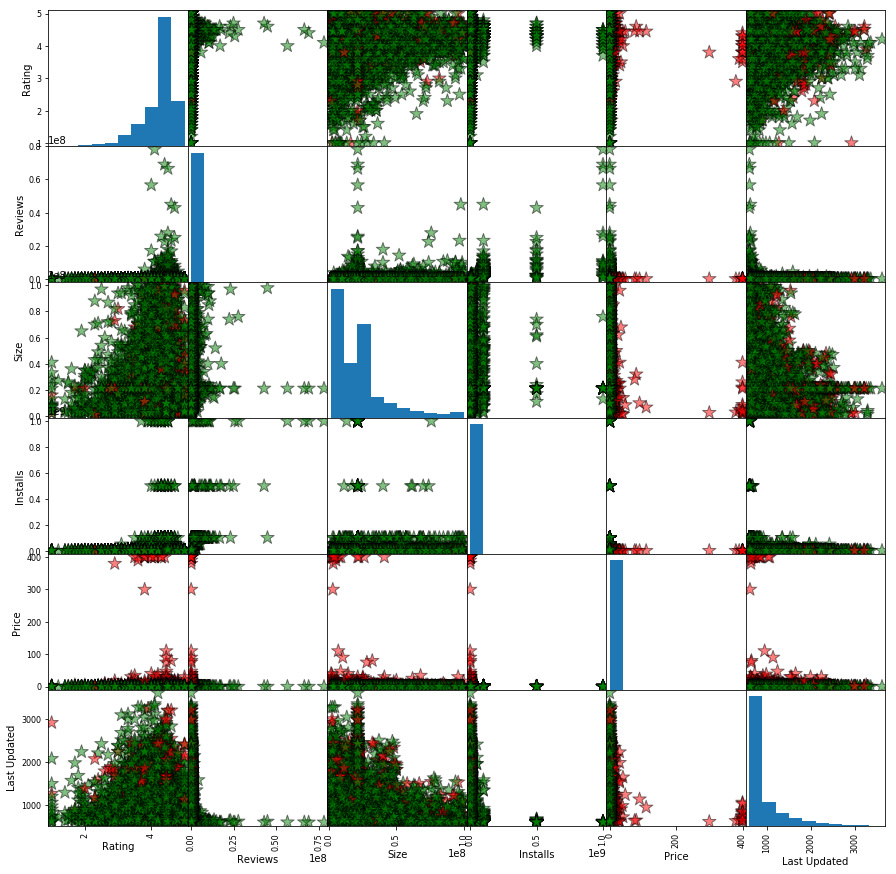

In [71]:
color_list = ['red' if i=='Paid' else 'green' for i in df.loc[:,'Type']]
pd.plotting.scatter_matrix(df.loc[:, df.columns != 'Type'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

**Correlation conclusion**: there is not an important correlation between numeric features

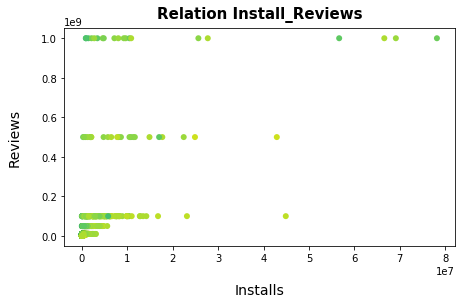

In [73]:
# Plot the best correlation founded
plt.figure(figsize=(7, 4)) 
plt.title('Relation Install_Reviews', fontsize=15,fontweight='bold', pad=10)
plt.xlabel('Installs', fontsize=14, labelpad=20)
plt.ylabel('Reviews', fontsize=14, labelpad=20)
plt.scatter(df.Reviews, df.Installs, c = df.Rating, linewidth=0)
plt.show()

## TYPE PREDICTION

In order to take the decision of implement our APP price or releasing it free for public, we are going to take into account diverse methods of machine learning classification, paying special attention to balance strategies

Difficulties:

- Imbalanced data
- Many categorical features
- Diverse meaning and magnithude of the numerical data

At the end of this chapter I will finally choose the better modell and take after that another Machine Learning method to adjust a price to our test APP 

In [75]:
data = df.copy()

In [76]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,817,1.0,4.0
Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,809,2.0,4.0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,611,1.2,4.0
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,665,Varies with device,4.2
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,653,1.1,4.4


#### SPLITTING FEATURES-TARGET

In [77]:
#type_dummy = {'Free': 1, 'Paid': 0}
#data['Type'].replace(type_dummy, inplace=True)
#Not necessary

In [79]:
y = data['Type']
X = data.drop(['Type','Price'],axis=1)# Price is not logical to be present because it inherit the significance magnitude of the Type

In [80]:
#print('The scikit-learn version is {}.'.format(sklearn.__version__))

#from sklearn.compose import ColumnTransformer
#from sklearn.datasets import fetch_openml
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

In [81]:
# determine categorical and numerical features
numeric_features = X.select_dtypes(include=['int64', 'float64','int32']).columns
categorical_features = X.select_dtypes(include=['object']).columns
categorical_features,numeric_features

(Index(['Category', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver'], dtype='object'),
 Index(['Rating', 'Reviews', 'Size', 'Installs', 'Last Updated'], dtype='object'))

In [82]:
X[categorical_features]= df[categorical_features].astype('category')
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9644 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 10 columns):
Category          9644 non-null category
Rating            9644 non-null float64
Reviews           9644 non-null int32
Size              9644 non-null float64
Installs          9644 non-null float64
Content Rating    9644 non-null category
Genres            9644 non-null category
Last Updated      9644 non-null int32
Current Ver       9644 non-null category
Android Ver       9644 non-null category
dtypes: category(5), float64(3), int32(2)
memory usage: 454.0+ KB


In [83]:
#Preprocessing whith scaler and get dummies
scaler = MinMaxScaler(feature_range=(0, 1))
X[numeric_features] = scaler.fit_transform(X[numeric_features])
print(X.shape)
X_dum = pd.get_dummies(X[categorical_features], drop_first = True, dummy_na = True)
X.drop(X[categorical_features], axis=1,inplace=True)#dropping categorical to next concat the dummies 
X_final = pd.concat([X,X_dum],axis=1)
print(X_final.shape)

(9644, 10)
(9644, 484)


In [84]:
# import preprocessing from sklearn for a more interesting way to one hot that get_dummies (more conectivity in pipelines)

#from sklearn import preprocessing

#X_categ_process = pd.DataFrame()

#for n, i in enumerate(categorical_features):
    #le = preprocessing.LabelEncoder()
   # x = pd.Series(le.fit_transform(X[i]))
    #X_categ_process.append(x,ignore_index=True)
    #X_categ_process[i]=x

#onehot = OneHotEncoder()
#X_onehot_df = pd.DataFrame(onehot.fit_transform(X_categ_process).toarray())    

**IMBALANCE DATA**: the target feature "Type" is unbalanced. This means that many of the observations have a free charge of the APP. If we try to create a model without take care of this we will asume that with the output of Free charge we will have the best acuracy. We can see here the problem. The model will not recognize to charge the APP because we don´t have enough samples. 

We are going to use diverse technichs to balance the data and get the best model of it

**METHOD 1: WITHOUT BALANCE**


In a binary model that seeks to predict whether we set a price or not, based on certain characteristics of our APP, we will consider the real classes p (ositive = the APP must have a price) and n (egative = the APP must be free), and the classes predicted by the model, N (o, is free) or Y (es, is subject to pricing).
In this way, the confusion matrix for this model has its rows labeled with the real classes, and its columns, with those predicted by the model.

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
 
from pylab import rcParams
 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
 
#from collections import Counter

In [86]:
#split train and test 
X_train, X_test, y_train, y_test = train_test_split(X_final, y, train_size=0.7)

In [87]:
#we create a function that make the model we use each time
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

In [88]:
#running the model
model = run_model(X_train, X_test, y_train, y_test)

In [89]:
# We create a function that show our classification results
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_pred))

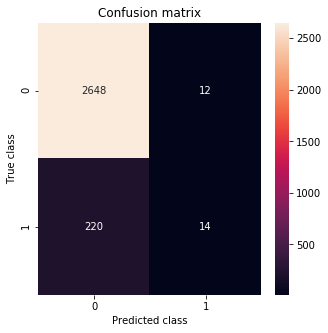

              precision    recall  f1-score   support

        Free       0.92      1.00      0.96      2660
        Paid       0.54      0.06      0.11       234

    accuracy                           0.92      2894
   macro avg       0.73      0.53      0.53      2894
weighted avg       0.89      0.92      0.89      2894



In [90]:
y_pred = model.predict(X_test)
mostrar_resultados(y_test, y_pred)


The main diagonal contains the sum of all correct predictions. The other diagonal reflects classifier errors:  “false positives” (says that it is Paid Type, but in reality it is not), or “false negatives” (says that it is Free Type, but is actually paid).

On the one hand we have only 12 false positives, which the model tell us are priced but are really free. These are very few compared to 2,648 hits (true negatives). But this does not really help us because it is very easy to predict that an APP is free  when in the imbalanced data the vast majority of APPs are free
In class 2 (it is what we are interested in detecting) we see 220 failures and 14 hits giving a recall of 0.06. It is the value/metric that we want to improve. We have predicted 220 as a free APP when it is really paid (false negatives) and 14 correctly predicted (true negatives). The ratio can already be seen with the naked eye that it is very bad. It is also interesting to note that in the f1-score column we obtain better results but it should not really deceive us ... they are reflecting a partial reality. The truth is that our model is not capable to detect correctly the cases in which we must set a price to the APP.

**METHOD 2. BALANCE IN PARAMETER OF THE LOGISTIC REGRESSION**

Strategy: We will use an additional parameter in the Logistic Regression model where we indicate weight = «balanced» and with this the algorithm will be in charge of balancing the minority class during training. Let's see:

In [91]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf

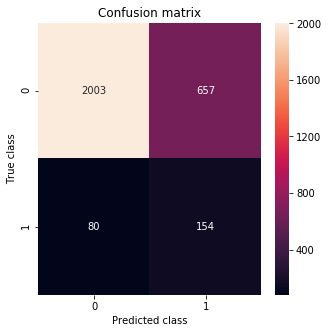

              precision    recall  f1-score   support

        Free       0.96      0.75      0.84      2660
        Paid       0.19      0.66      0.29       234

    accuracy                           0.75      2894
   macro avg       0.58      0.71      0.57      2894
weighted avg       0.90      0.75      0.80      2894



In [92]:
model = run_model_balanced(X_train, X_test, y_train, y_test)
y_pred = model.predict(X_test)
mostrar_resultados(y_test, y_pred)

We see an improvement more than important respect to the Recall type II metric, that interests us. Now we hit 154 APPs that are paid type, but we still fail at 80. The f1-score of the positives ("Free") indicates that we have worsened the forecasts with respect to the previous model. But, what really we prefer?, to keep our APP free of charge when we could be taking out monetary yield or to adjust the model more to hit the positive forecasts? Obviously the latter

**METHOD 3 :SUBSAMPLING MAJORITY CLASS**

What we are going to do is to use an algorithym that reduce the majority class. That algorithym act similar to K-nearest neighbour and select what observations are removed. We could see how well we have improve the model with this technich.

In [93]:
us = NearMiss(n_neighbors=3, version=2)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({'Free': 6238, 'Paid': 512})
Distribution after resampling Counter({'Free': 512, 'Paid': 512})


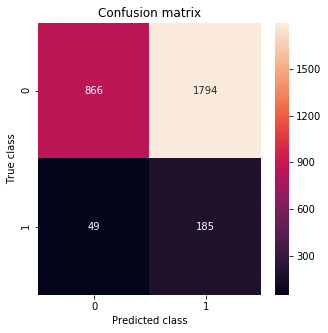

              precision    recall  f1-score   support

        Free       0.95      0.33      0.48      2660
        Paid       0.09      0.79      0.17       234

    accuracy                           0.36      2894
   macro avg       0.52      0.56      0.33      2894
weighted avg       0.88      0.36      0.46      2894



In [94]:
model = run_model(X_train_res, X_test, y_train_res, y_test)
y_pred = model.predict(X_test)
mostrar_resultados(y_test, y_pred)

Indeed we see that we obtain a good output with a recall of 0.79, but this better recall perform at cost of a high false positive increment. For that reason this  model don´t seem to be well adjusted

**METHOD 4: Oversampling of minority class**

In this case, we are creatig new synthethic samples of minority class using RandomOverSampler

In [95]:
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_sample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({'Free': 6238, 'Paid': 512})
Distribution labels after resampling Counter({'Free': 6238, 'Paid': 6238})


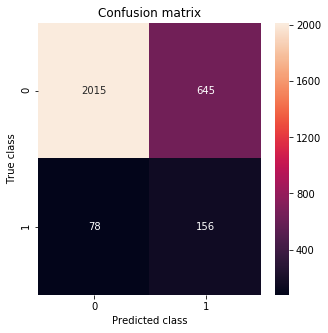

              precision    recall  f1-score   support

        Free       0.96      0.76      0.85      2660
        Paid       0.19      0.67      0.30       234

    accuracy                           0.75      2894
   macro avg       0.58      0.71      0.57      2894
weighted avg       0.90      0.75      0.80      2894



In [96]:
model = run_model(X_train_res, X_test, y_train_res, y_test)
y_pred = model.predict(X_test)
mostrar_resultados(y_test, y_pred)

We have a 0.67 recall for the class 2 and the false positives ahve not increase so much. That´st right

**METHOD 5: COMBINING RESAMPLE WITH SMOTE-TOMEK**

Now we are using a common technic that consists in using simultaneusly a subsampling algorithym  and other of oversampling at the same time. We use Smote for oversampling. It search for near neighbours and agregate points «in straight line» between them. And we use Tomek for undersampling, that remove those of different class that are near neighboours and let´s see better the decision boundary (the border area of our classes) 

In [97]:
os_us = SMOTETomek(sampling_strategy=0.5)
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))
 

Distribution before resampling Counter({'Free': 6238, 'Paid': 512})
Distribution after resampling Counter({'Free': 6186, 'Paid': 3067})


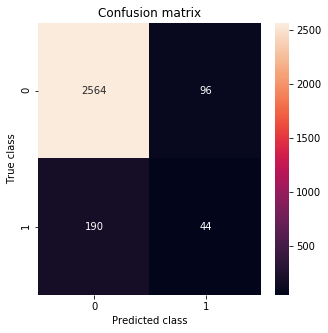

              precision    recall  f1-score   support

        Free       0.93      0.96      0.95      2660
        Paid       0.31      0.19      0.24       234

    accuracy                           0.90      2894
   macro avg       0.62      0.58      0.59      2894
weighted avg       0.88      0.90      0.89      2894



In [98]:
model = run_model(X_train_res, X_test, y_train_res, y_test)
y_pred = model.predict(X_test)
mostrar_resultados(y_test, y_pred)

It gives us a very low recall and not suitable for our objective

**METHOD 6:  Balancing Models Assembly**

For this strategy we will use an Ensamble Classifier that uses Bagging and the model will be a DecisionTree. Let's see how it behaves:

In [99]:
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

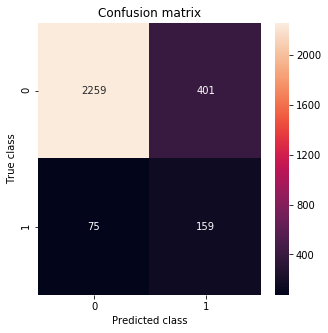

              precision    recall  f1-score   support

        Free       0.97      0.85      0.90      2660
        Paid       0.28      0.68      0.40       234

    accuracy                           0.84      2894
   macro avg       0.63      0.76      0.65      2894
weighted avg       0.91      0.84      0.86      2894



In [100]:
#Train the classifier.
bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_test)
mostrar_resultados(y_test, y_pred)

We see an important improvement regarding the Recall metric of type II that interests us, without for this we have lowered the type I error considerably. Now we hit 159 APPs that are paid, but we continue to fail at 75.

**CONCLUSION**

** Despite the fact that this model has a somewhat lower recall than the Subsampling model 3, we prefer it because it tolerates not so many mistakes in the negatives (APP Free that are predicted as paid) **

With this we could pass the features of our APP to obtain the prediction of whether to set a price

In [101]:
y_test[y_test=="Paid"] # we choose an APP of the test data to make sure we didn´t train with it
# It would be the App "Clue"

App
I am Rich Person                                    Paid
pretty Easy privacy p≡p                             Paid
Advanced EX for KIA                                 Paid
MC.Fitting                                          Paid
DL Image Manager                                    Paid
Z PIVOT                                             Paid
RAM Cleanup Ad-Free Option                          Paid
NewTek NDI                                          Paid
AG Subway Simulator Mobile                          Paid
Dr. Panda Art Class                                 Paid
DRAGON QUEST III                                    Paid
Android P Style Icon Pack                           Paid
Interactive NPC DM Tool                             Paid
Absolute RC Heli Simulator                          Paid
Star Wars ™: DIRTY                                  Paid
Ai-Ball AV Recorder                                 Paid
DW Contacts widget                                  Paid
Camera FV-5                

In [102]:
#Our App
app_x=pd.DataFrame(X_final.loc["Clue"]).T

In [103]:
APP_pred = bbc.predict(app_x)
APP_pred # The output is "Paid" Type. We have predict a difficult clasification due to the imbalance data

array(['Paid'], dtype=object)

## **PRICE PREDICTION**

In this phase we want to set our App price

We are going to create a Pipeline and compare two different regresion algorithyms. We will choose the one with the best metric


In [104]:
fastview(data.Price)

('the feature has 0 nan values',
 'the feature has 0 null values',
 'the feature has the type of float64',
 0.00    8898
 0.99     145
 2.99     123
 1.99      72
 4.99      70
 3.99      56
 1.49      45
 5.99      26
 2.49      25
 9.99      19
 Name: Price, dtype: int64)

In [105]:
data_pricing = data[data.Price!=0.00]

In [106]:
data_pricing.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.800000e+06,100000.0,Paid,4.99,Everyone,Business,740,1.5,4.0
Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,3.900000e+07,100000.0,Paid,4.99,Everyone,Business,1088,3.4,3.0
Puffin Browser Pro,COMMUNICATION,4.0,18247,2.116677e+07,100000.0,Paid,3.99,Everyone,Communication,638,7.5,4.1
"Moco+ - Chat, Meet People",DATING,4.2,1545,2.116677e+07,10000.0,Paid,3.99,Mature 17+,Dating,654,2.6,4.1
Calculator,DATING,2.6,57,6.200000e+06,1000.0,Paid,6.99,Everyone,Dating,891,1.1,4.0


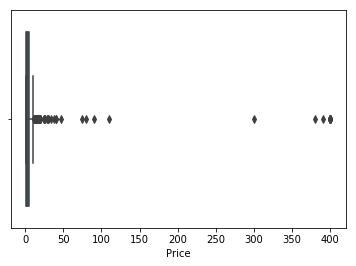

In [107]:
#outliers in my target that we want to remove. It involves APP for rich people
sns.boxplot(x=data_pricing['Price'])

In [108]:
data_pricing = data_pricing[ data_pricing['Price']<200]

In [109]:
y = data_pricing['Price']
X = data_pricing.drop(['Price','Type'],axis=1)# Type is correlated to Price

In [110]:
# split categorical and numerical features
numeric_features = X.select_dtypes(include=['int64', 'float64','int32']).columns
categorical_features = X.select_dtypes(include=['object']).columns
X[categorical_features]= df[categorical_features].astype('category')
X.info()
categorical_features,numeric_features

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, TurboScan: scan documents and receipts in PDF to Word Search Tab 1 FR
Data columns (total 10 columns):
Category          731 non-null category
Rating            731 non-null float64
Reviews           731 non-null int32
Size              731 non-null float64
Installs          731 non-null float64
Content Rating    731 non-null category
Genres            731 non-null category
Last Updated      731 non-null int32
Current Ver       731 non-null category
Android Ver       731 non-null category
dtypes: category(5), float64(3), int32(2)
memory usage: 53.6+ KB


(Index(['Category', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver'], dtype='object'),
 Index(['Rating', 'Reviews', 'Size', 'Installs', 'Last Updated'], dtype='object'))

In [111]:
X_dum = pd.get_dummies(X[categorical_features], drop_first = True, dummy_na = True)
X.drop(X[categorical_features], axis=1,inplace=True)
X_final = pd.concat([X,X_dum],axis=1)
X_final.shape

(731, 484)

In [112]:
X = X_final.copy()
X.head()

,Rating,Reviews,Size,Installs,Last Updated,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Android Ver_4.3,Android Ver_4.4,Android Ver_5.0,Android Ver_5.1,Android Ver_6.0,Android Ver_7.0,Android Ver_7.1,Android Ver_8.0,Android Ver_Varies with device,Android Ver_nan
App,,,,,,,,,,,,,,,,,,,,,
TurboScan: scan documents and receipts in PDF,4.7,11442,6.800000e+06,100000.0,740,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Tiny Scanner Pro: PDF Doc Scan,4.8,10295,3.900000e+07,100000.0,1088,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Puffin Browser Pro,4.0,18247,2.116677e+07,100000.0,638,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Moco+ - Chat, Meet People",4.2,1545,2.116677e+07,10000.0,654,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Calculator,2.6,57,6.200000e+06,1000.0,891,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression
from sklearn import tree

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', LinearRegression())])

pipe_dt = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', tree.DecisionTreeRegressor(random_state=42))])

# List of pipelines for ease of iteration
pipelines = [pipe_lr, pipe_dt]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0:  'LinearRegression', 1: 'Decision Tree'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Compare accuracies
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
    if val.score(X_test, y_test) > best_acc:
        best_acc = val.score(X_test, y_test)
        best_pipe = val
        best_clf = idx
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])

# Save pipeline to file
#joblib.dump(best_pipe, 'best_pipeline.pkl', compress=1)
#print('Saved %s pipeline to file' % pipe_dict[best_clf])

LinearRegression pipeline test accuracy: -0.002
Decision Tree pipeline test accuracy: -0.189
Classifier with best accuracy: LinearRegression


In [117]:
y_predict_dt = pipe_dt.predict(X_test)
result_dt = pd.DataFrame({'y_test':y_test,'y_predict_dt':y_predict_dt,'error':(y_test-y_predict_dt)})
result_dt.head()

,y_test,y_predict_dt,error
App,,,
SCI-FI UI,1.99,0.99,1.00
Toca Builders,3.99,2.99,1.00
I am Rich Person,37.99,2.49,35.50
ch-mm Dict,1.96,3.99,-2.03
Electrician Calculator Pro,14.99,2.59,12.40


** Using MSE as my metric **

In [118]:
summation = 0  #variable to store the summation of differences
n = len(y_test) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
      difference = y_test[i] - y_predict_dt[i]  #finding the difference between observed and predicted value
      squared_difference = difference**2  #taking square of the differene 
      summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n  #dividing summation by total values to obtain average
print("The Mean Square Error is: " , MSE)

# equal result: mse_dt = sum((result_dt['error'])**2)/len(result_dt)
# equal result: mse_dt = mean_squared_error(y_test,y_predict_dt)

The Mean Square Error is:  99.33665782312926


In [119]:
y_predict_lr = pipe_lr.predict(X_test)
result_lr = pd.DataFrame({'y_test':y_test,'y_predict_lr':y_predict_lr,'error':(y_test-y_predict_lr)})
y_predict_lr = pipe_lr.predict(X_test)
result_lr.head()

,y_test,y_predict_lr,error
App,,,
SCI-FI UI,1.99,4.449029,-2.459029
Toca Builders,3.99,4.817861,-0.827861
I am Rich Person,37.99,4.869597,33.120403
ch-mm Dict,1.96,3.837907,-1.877907
Electrician Calculator Pro,14.99,4.645342,10.344658


In [120]:
summation = 0  #variable to store the summation of differences
n = len(y_test) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
      difference = y_test[i] - y_predict_lr[i]  #finding the difference between observed and predicted value
      squared_difference = difference**2  #taking square of the differene 
      summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n  #dividing summation by total values to obtain average
print("The Mean Square Error is: " , MSE)

# equal result: mse_lr = sum((result_lr['error'])**2)/len(result_lr)
# equal result: mse_lr = mean_squared_error(y_test,y_predict_lr)

The Mean Square Error is:  83.762837570194


#### CONCLUSION: my best model is the linear regression 

There are several aspects that I have to keep improving, as to perfection the input data as to avoid leakage data. It has to be done with order. 

I was trying to one hot encode in the pipeline with unsuccessful result. For that I had to implement get_dummy, that is correct, that have less reproducibility in the practice with new data

Good references:
    
- https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados
- https://medium.com/datos-y-ciencia/gesti%C3%B3n-de-flujos-de-trabajo-de-machine-learning-con-pipelines-de-scikit-learn-parte-1-una-8a37fcc7c1d0